<footer id="footer"></footer>

# <center> Анализ бизнес-показателей </center>

<p align="center"><img src=https://i.ibb.co/s1LNnw4/cinema-cover-1.png'></p>

Необходимо помочь маркетологам снизить расходы — отказаться от невыгодных источников трафика и перераспределить бюджет.  


Есть данные **Яндекс.Афиши** с июня 2017 по конец мая 2018 года:
лог сервера с данными о посещениях сайта Яндекс.Афиши,
выгрузка всех заказов за этот период,
статистика рекламных расходов.  


Нам необходимо изучить:
- как клиенты пользуются сервисом,
- когда делают первые покупки на сайте,
- сколько денег приносит компании каждый клиент,
- когда расходы на привлечение клиента окупаются.

<a href="#footer">К содержанию</a>
<footer id="footer"></footer>

---

## Загрузка данных и подготовка к анализу

In [1]:
%%capture
!gdown --id 1ryHJ-Ehp4o2eh5P6csUqgBZy2ySgMBkF
!unzip /content/project.zip

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
import scipy.stats as stats
import warnings

sns.set_style('darkgrid')
warnings.filterwarnings("ignore")
np.random.seed(42)

In [3]:
try:
    visits_log = pd.read_csv('/content/visits_log.csv')
    orders_log = pd.read_csv('/content/orders_log.csv')
    costs = pd.read_csv('/content/costs.csv')
except:
    visits_log = pd.read_csv('/datasets/visits_log.csv')
    orders_log = pd.read_csv('/datasets/orders_log.csv')
    costs = pd.read_csv('/datasets/costs.csv')
finally:
    print('Данные успешно загружены')

Данные успешно загружены


In [4]:
def get_info(data):
    display(data.head().style.set_caption('Общая информация по датасету'))
    display(data.describe().T)
    print('----')
    print('Информация о пропусках и типах данных')
    print('----')
    print()
    display(data.info())
    print('----')
    print()

<a href="#footer">К содержанию</a>
<footer id="footer"></footer>

---

### Визиты

In [5]:
get_info(visits_log)

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


,count,mean,std,min,25%,50%,75%,max
Source Id,359400.0,3.750515e+00,1.917116e+00,1.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00,1.000000e+01
Uid,359400.0,9.202557e+18,5.298433e+18,1.186350e+13,4.613407e+18,9.227413e+18,1.372824e+19,1.844668e+19


----
Информация о пропусках и типах данных
----

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


None

----



Файл `visits_log.csv` хранит лог сервера с информацией о посещениях сайта.  


`Uid` — уникальный идентификатор пользователя,  
`Device` — категория устройства пользователя,  
`Start Ts` — дата и время начала сессии,  
`End Ts` — дата и время окончания сессии,  
`Source Id` — идентификатор источника перехода на сайт.

In [6]:
visits_log.duplicated().sum()

0

Пропусков нет. Дубликатов явных нет - изменим названия признаков для удобства работы, а также приведем временные признаки к типу данных `datetime64[ns]`

In [7]:
visits_log.columns = (visits_log.columns
                      .str.lower()
                      .str.replace(' ','_')
                     )

d_cols = ['end_ts', 'start_ts']

for col in d_cols:
    visits_log[col] = pd.to_datetime(visits_log[col], 
                                   format = '%Y-%m-%d %H:%M:%S'
                                   )

In [8]:
visits_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  object        
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


<a href="#footer">К содержанию</a>
<footer id="footer"></footer>

---

### Заказы

In [9]:
get_info(orders_log)

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.000000,10329302124590727494
1,2017-06-01 00:25:00,0.550000,11627257723692907447
2,2017-06-01 00:27:00,0.370000,17903680561304213844
3,2017-06-01 00:29:00,0.550000,16109239769442553005
4,2017-06-01 07:58:00,0.370000,14200605875248379450


,count,mean,std,min,25%,50%,75%,max
Revenue,50415.0,4.999647e+00,2.181836e+01,0.000000e+00,1.220000e+00,2.500000e+00,4.890000e+00,2.633280e+03
Uid,50415.0,9.098161e+18,5.285742e+18,3.135781e+14,4.533567e+18,9.102274e+18,1.368290e+19,1.844617e+19


----
Информация о пропусках и типах данных
----

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


None

----



Файл `orders_log.csv` содержит информацию о заказах.  


`Uid` — уникальный идентификатор пользователя,  
`Buy Ts` — дата и время заказа,  
`Revenue` — сумма заказа.  

In [10]:
orders_log.duplicated().sum()

0

Пропусков нет. Дубликатов явных нет - изменим названия признаков для удобства работы, а также приведем временные признаки к типу данных `datetime64[ns]`

In [11]:
orders_log.columns = (orders_log.columns
                      .str.lower()
                      .str.replace(' ','_')
                     )
orders_log['buy_ts'] = pd.to_datetime(orders_log['buy_ts'], 
                                      format = '%Y-%m-%d %H:%M:%S'
                                      )

In [12]:
orders_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


<a href="#footer">К содержанию</a>
<footer id="footer"></footer>

---

### Расходы на маркетинг

In [13]:
get_info(costs)

,source_id,dt,costs
0,1,2017-06-01,75.200000
1,1,2017-06-02,62.250000
2,1,2017-06-03,36.530000
3,1,2017-06-04,55.000000
4,1,2017-06-05,57.080000


,count,mean,std,min,25%,50%,75%,max
source_id,2542.0,4.857199,3.181581,1.00,2.000,4.000,9.000,10.00
costs,2542.0,129.477427,156.296628,0.54,21.945,77.295,170.065,1788.28


----
Информация о пропусках и типах данных
----

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


None

----



Файл `costs.csv` содержит информацию о расходах на маркетинг  


`source_id` — идентификатор рекламного источника,
`dt` — дата проведения рекламной кампании,
`costs` — расходы на эту кампанию.

In [14]:
costs.duplicated().sum()

0

Пропусков нет. Дубликатов явных нет. Признак `dt` приведем к `datetime64[ns]`

In [15]:
costs['dt'] = pd.to_datetime(costs['dt'], 
                                  format = '%Y-%m-%d'
                                  )

<a href="#footer">К содержанию</a>
<footer id="footer"></footer>

---

Загрузили данные. Пропусков не обнаружено. Были произведены замены названий признаков для удобства работы, а также провели замену временных признаков к `datetime-формату`

<a href="#footer">К содержанию</a>
<footer id="footer"></footer>

---

 ## Рассчет основных метрик и построение графиков

### Продуктовые метрики

#### DAU, WAU и MAU

Посмотрим на активных пользователей в трёх измерениях и посмотрим `vanity metrics`:   

`DAU` — количество уникальных пользователей в день;  
`WAU` — количество уникальных пользователей в неделю;  
`MAU` — количество уникальных пользователей в месяц.   

Чтобы посчитать дневное, недельное и месячное использование, выделим в отдельные столбцы год, месяц и неделю, а также полную дату. 

In [16]:
visits_log = (visits_log.assign(
                
                session_date = lambda x: x['start_ts'].dt.date,
                session_week  = lambda x: x['start_ts'].dt.week,
                session_month = lambda x: x['start_ts'].dt.month,
                session_year = lambda x: x['start_ts'].dt.year
                
                )
)

visits_log.head()

,device,end_ts,source_id,start_ts,uid,session_date,session_week,session_month,session_year
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,51,12,2017
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,8,2,2018
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,26,7,2017
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,20,5,2018
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,52,12,2017


Сгруппируем данные по уникальным пользователям и найдём среднее:

In [17]:
dau = visits_log.groupby('session_date').agg({'uid': 'nunique'})
wau = (
    visits_log.groupby(['session_year', 'session_week'])
    .agg({'uid': 'nunique'})
)
mau = (
    visits_log.groupby(['session_year', 'session_month'])
    .agg({'uid': 'nunique'})
)
print(f'Среднее DAU составляет  -  {int(dau.mean())} уникальных пользователей в день;')
print(f'Среднее WAU составляет  -  {int(wau.mean())} уникальных пользователей в неделю;')
print(f'Среднее MAU составляет  -  {int(mau.mean())} уникальных пользователей в месяц')

Среднее DAU составляет  -  907 уникальных пользователей в день;
Среднее WAU составляет  -  5716 уникальных пользователей в неделю;
Среднее MAU составляет  -  23228 уникальных пользователей в месяц


Отобразим изменения метрик во времени на графиках:

In [18]:
def au_plot(data, metric):
    plt.figure(figsize=(15,5))
    data['uid'].plot(title=f'Уникальных пользователей по {metric}')
    plt.xlabel('Дата')
    plt.ylabel(metric)
    plt.show()

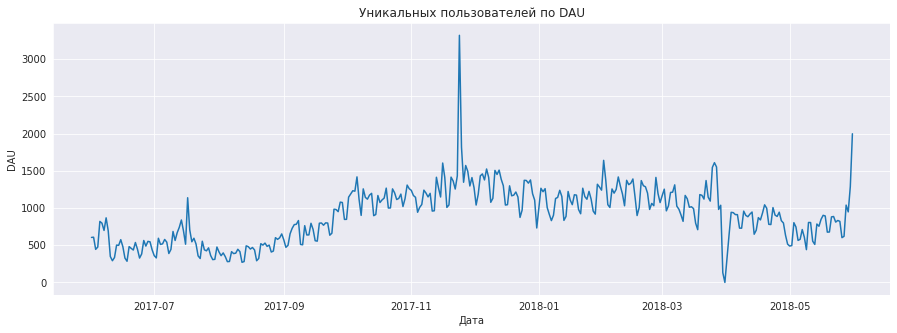

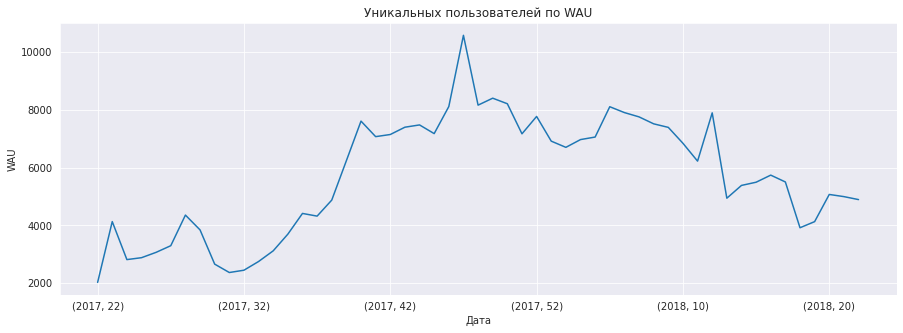

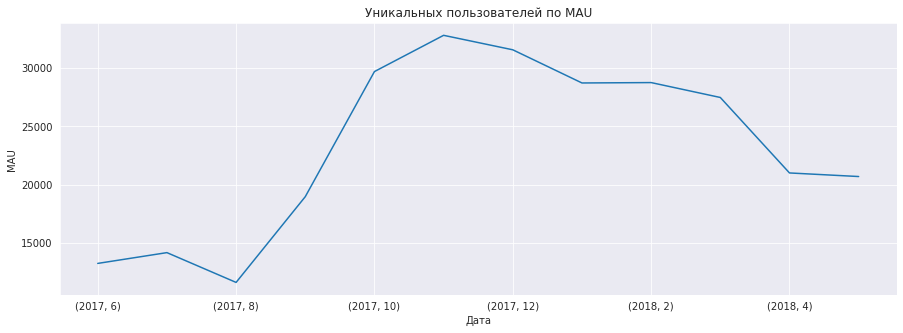

In [19]:
data = [dau, wau, mau]
metrics = ['DAU', 'WAU', 'MAU']
for idx, df in enumerate(data):
    au_plot(df, metrics[idx])

Довольно приличное количество уникальных пользователей в месяц, но стоит отметить спады с 6 по 8 месяц - летние дни - возможно связано с периодом отпусков, погодными условями - люди предпочитают проводить время на улице. Найдем `sticky factor` по отношению к месячной и недельной аудитории. Посмотрим регулярность использования нашего сайта — то, как часто пользователи к нему обращаются.

In [20]:
sticky_wau = float(dau.mean() / wau.mean())
sticky_mau = float(dau.mean() / mau.mean())

print('"Липкий фактор" по отношению к недельной аудитории {:.2%}'.format(sticky_wau))
print('"Липкий фактор" по отношению к месячной аудитории  {:.2%}'.format(sticky_mau))

"Липкий фактор" по отношению к недельной аудитории 15.88%
"Липкий фактор" по отношению к месячной аудитории  3.91%


Необходимо следить за показателями "Липкого фактора" - сейчас что то конкретное сказать затруднительно - есть рост или нет. Вовлеченность некоторая наблюдается

<a href="#footer">К содержанию</a>
<footer id="footer"></footer>

---

#### ASL (средняя продолжительность сессии)

In [21]:
sessions_by_day = int(visits_log.groupby(['session_date']).agg({'uid':['count']}).mean())
print(f'Среднее количество сессий в день составляет: {sessions_by_day}')

Среднее количество сессий в день составляет: 987


Достаточно внушительный показатель. Посчитаем среднее количество сессия в день на пользователя

In [22]:
sess_per_user = visits_log.groupby(['session_date', 'uid']).agg({'start_ts': 'count'})
sess_per_user = sess_per_user.groupby('session_date').agg({'start_ts': 'mean'})
cnt = round(sess_per_user['start_ts'].mean(), 2)
print(f'Среднее количество сессий в день на пользователя: {cnt}')

Среднее количество сессий в день на пользователя: 1.08


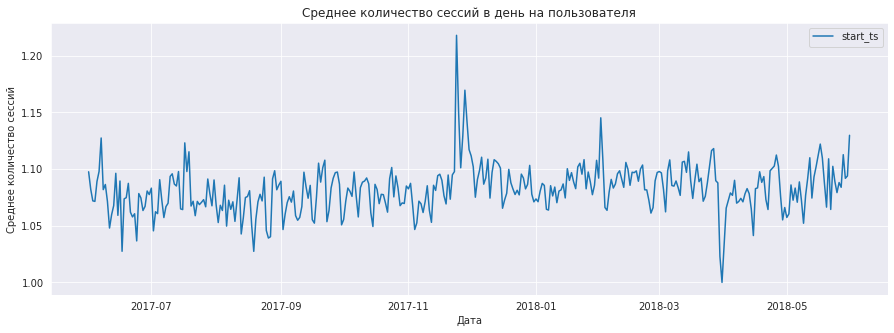

In [23]:
sess_per_user.plot(figsize=(15,5), title='Среднее количество сессий в день на пользователя')
plt.xlabel('Дата')
plt.ylabel('Среднее количество сессий')
plt.show()

Найдем среднюю продолжительность сессии(**ASL**)  

Найдём ASL — посчитаем длину всех сессий и вычислим среднее:

In [24]:
visits_log['session_duration_sec'] = (visits_log['end_ts'] - visits_log['start_ts']).dt.seconds
ASL = round(visits_log['session_duration_sec'].mean(), 2)
print(f'Среднее время сессии ASL составляет: {ASL} секунд')

Среднее время сессии ASL составляет: 643.51 секунд


Посмотрим на получившиейся данные:

In [25]:
visits_log['session_duration_sec'].describe().T

count    359400.000000
mean        643.506489
std        1016.334786
min           0.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       84480.000000
Name: session_duration_sec, dtype: float64

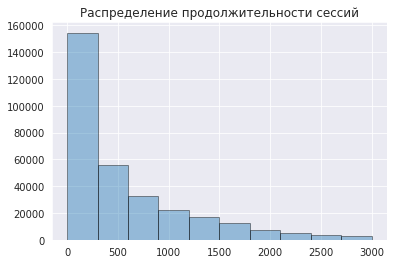

In [26]:
visits_log['session_duration_sec'].hist(range=[1,3000], ec='black', alpha=.42)
plt.title('Распределение продолжительности сессий');

Наше распределение далеко от нормально, среднее брать не стоит - посмотрим значение моды и медианы

In [27]:
mode_duration = visits_log['session_duration_sec'].mode()[0]
median_duration = visits_log['session_duration_sec'].median()
print(f'Мода для продолжительности сессии: {mode_duration} секунд')
print(f'Медиана для продолжительности сессии: {median_duration} секунд')

Мода для продолжительности сессии: 60 секунд
Медиана для продолжительности сессии: 300.0 секунд


Чаще всего пользователи сидят на сайте не продолжительное время. Возможно, наш сайт плохо отображается в мобильной версии — и все сессии со смартфонов и планшетов очень короткие. Так или иначе - сделать вывод о том, много это или мало - нам необходимо посмотреть дополнительные метрики. Обратимся к `Retention Rate` и увидим сколько пользователей из когорты относительно их изначального числа вернулось в последующие периоды.  



<a href="#footer">К содержанию</a>
<footer id="footer"></footer>

---

#### Retention rate

Узнаем, как изменяется поведение каждой когорты на протяжении времени. Для начала сформируем когорты по месяцам - определим событие и период — на их основе сформируем когорту. Возьмём дату, когда пользователь впервые проявил активность на сайте.

In [28]:
first_visit_date = visits_log.groupby('uid')['session_date'].min()
first_visit_date.name='first_visit'

visits_log = visits_log.join(first_visit_date, on='uid')
visits_log['first_visit'] = visits_log['first_visit'].astype('datetime64[M]')
visits_log['session_date'] = visits_log['session_date'].astype('datetime64[M]')

visits_log.head()

,device,end_ts,source_id,start_ts,uid,session_date,session_week,session_month,session_year,session_duration_sec,first_visit
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-01,51,12,2017,1080,2017-12-01
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-01,8,2,2018,1680,2018-02-01
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,26,7,2017,0,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-01,20,5,2018,1440,2018-03-01
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-01,52,12,2017,0,2017-12-01


In [29]:
visits_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   device                359400 non-null  object        
 1   end_ts                359400 non-null  datetime64[ns]
 2   source_id             359400 non-null  int64         
 3   start_ts              359400 non-null  datetime64[ns]
 4   uid                   359400 non-null  uint64        
 5   session_date          359400 non-null  datetime64[ns]
 6   session_week          359400 non-null  int64         
 7   session_month         359400 non-null  int64         
 8   session_year          359400 non-null  int64         
 9   session_duration_sec  359400 non-null  int64         
 10  first_visit           359400 non-null  datetime64[ns]
dtypes: datetime64[ns](4), int64(5), object(1), uint64(1)
memory usage: 30.2+ MB


In [30]:
visits_log['cohort_lifetime'] = ((visits_log['session_date'] 
                                  - visits_log['first_visit']) 
                                  / np.timedelta64(1, 'M')
                                  )

visits_log['cohort_lifetime'] = (visits_log['cohort_lifetime']
                                 .round()
                                 .astype('int')
                                 )

In [31]:
visit_cohorts = (visits_log.groupby(['first_visit','cohort_lifetime'])['uid']
                 .nunique()
                 .reset_index())

# найдём исходное количество пользователей в когорте. Возьмём их число на нулевой месяц

initial_users_count = visit_cohorts[visit_cohorts['cohort_lifetime'] == 0][['first_visit','uid']]
initial_users_count.rename(columns={'uid':'cohort_users'}, inplace=True)

Объединим данные по когортам с исходным количеством пользователей в когорте и  рассчитаем `Retention Rate`. Разделим количество активных пользователей в каждую из недель на исходное число пользователей в когорте::

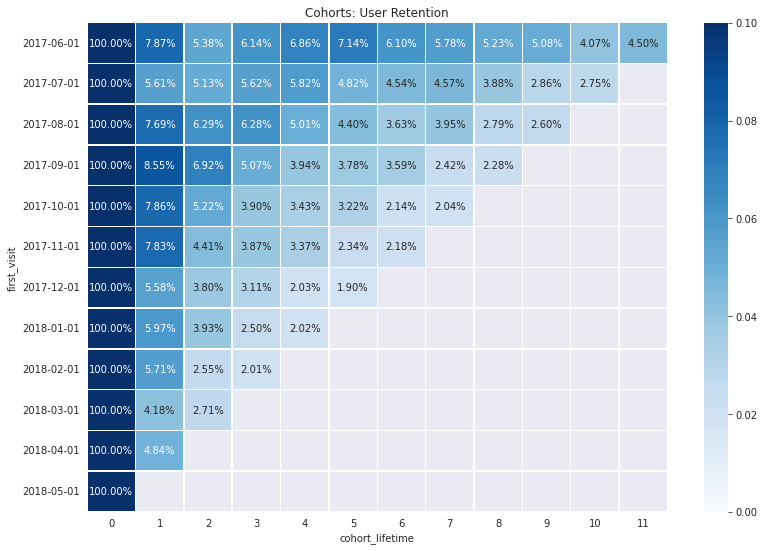

In [32]:
visit_cohorts = visit_cohorts.merge(initial_users_count, on='first_visit')
visit_cohorts['retention'] = visit_cohorts['uid']/visit_cohorts['cohort_users']
retention_pivot = visit_cohorts.pivot_table(index='first_visit', columns='cohort_lifetime', 
                          values='retention', aggfunc='sum')



plt.figure(figsize=(13, 9))
plt.title('Cohorts: User Retention')
ax = sns.heatmap(retention_pivot, annot=True, fmt='.2%', 
                 linewidths=.42, linecolor='white',
                 cmap='Blues', vmin=0., vmax=0.1)
ax.set_yticklabels(retention_pivot.index.date)
plt.show()

In [33]:
second_month_rr = retention_pivot[1].mean()
print('Средний Retention Rate на второй месяц «жизни» когорт - {:.2%}'.format(second_month_rr))

Средний Retention Rate на второй месяц «жизни» когорт - 6.52%


Retention Rate в следующий месяц значительно убывает по когортам с течением времени - резкое падение на второй месяц - дальше уже наблюдаем более менее стабильное поведение. Чаще всего пользователи проводят на сервисе минуту - необходимо увеличивать удержание и разбираться в причинах.

<a href="#footer">К содержанию</a>
<footer id="footer"></footer>

---

### Метрики электронной коммерции

#### Средний чек и исследование пользовательской сессии

Исследуем, сколько времени в среднем проходит с момента первого посещения сайта до совершения покупки - найдем время первой покупки:


In [34]:
first_event = orders_log.groupby('uid')['buy_ts'].min()
first_event.name = 'first_buy' 
orders_log = orders_log.join(first_event, on='uid')
orders_log['first_buy_date'] = orders_log['first_buy'].astype('datetime64[M]')

orders_log.head()

,buy_ts,revenue,uid,first_buy,first_buy_date
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01


Добавим в сет с визитами данные о первой покупке и теперь мы можем рассчитать количество дней до первой покупки

In [35]:
visits_log = visits_log.merge(orders_log[['uid','first_buy_date']], on='uid', how='left')
visits_log['days_before_first_order'] = (((visits_log['first_buy_date'] - visits_log['first_visit'])
                                            / np.timedelta64(1,'D'))
                                            .astype('int64', errors='ignore')
)

In [36]:
visits_log.head()

,device,end_ts,source_id,start_ts,uid,session_date,session_week,session_month,session_year,session_duration_sec,first_visit,cohort_lifetime,first_buy_date,days_before_first_order
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-01,51,12,2017,1080,2017-12-01,0,NaT,NaN
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-01,8,2,2018,1680,2018-02-01,0,NaT,NaN
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,26,7,2017,0,2017-07-01,0,NaT,NaN
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-01,20,5,2018,1440,2018-03-01,2,2018-03-01,0.0
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-01,52,12,2017,0,2017-12-01,0,NaT,NaN


Посмотрим на типы устройств, с которых заходят полльзователи и определим время до первой покупки в зависимости от устройств

In [37]:
devices = list(visits_log['device'].unique())
for device in devices:
    print('---------------')
    print(f'Информация по {device}')
    print('---------------')
    display(visits_log[visits_log['device'] == device]['days_before_first_order'].describe())
    mode = visits_log[visits_log['device'] == device]['days_before_first_order'].mode()[0]
    median = visits_log[visits_log['device'] == device]['days_before_first_order'].median()
    print(f'Мода составляет {mode}')
    print('---------------')
    print(f'Медиана составляет {median}')
    print('---------------')

---------------
Информация по touch
---------------


count    48615.000000
mean        53.949913
std         78.486479
min          0.000000
25%          0.000000
50%          0.000000
75%         92.000000
max        334.000000
Name: days_before_first_order, dtype: float64

Мода составляет 0.0
---------------
Медиана составляет 0.0
---------------
---------------
Информация по desktop
---------------


count    713192.000000
mean         13.702778
std          37.808490
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         334.000000
Name: days_before_first_order, dtype: float64

Мода составляет 0.0
---------------
Медиана составляет 0.0
---------------


Среднее время до покупки для мобильных устройств - 53 дня, для настольных компьютеров - 13 дней, но большинство пользователей производят покупку в первый день после регистрации. 

Приблизим немного сессии до минут:

In [38]:
init_visit = visits_log.groupby('uid').agg({'start_ts':'min'}).reset_index()
init_order = orders_log.groupby('uid').agg({'first_buy':'min'}).reset_index()
buy_time = pd.merge(init_visit, init_order, on='uid', how='inner')

buy_time['mins_to_buy'] = ((buy_time['first_buy'] - buy_time['start_ts'])
                           .dt.seconds / 60
)
buy_time = pd.merge(buy_time, visits_log[['uid', 'device']], on='uid')


In [39]:
buy_time.head()

,uid,start_ts,first_buy,mins_to_buy,device
0,313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00,1382.0,desktop
1,313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00,1382.0,desktop
2,313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00,1382.0,desktop
3,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00,0.0,touch
4,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00,0.0,touch


In [40]:
devices = list(visits_log['device'].unique())
for device in devices:
    print('---------------')
    print(f'Информация по {device}')
    print('---------------')
    display(buy_time[buy_time['device'] == device]['mins_to_buy'].describe())
    mode = buy_time[buy_time['device'] == device]['mins_to_buy'].mode()[0]
    median = buy_time[buy_time['device'] == device]['mins_to_buy'].median()
    print(f'Мода составляет {mode}')
    print('---------------')
    print(f'Медиана составляет {median}')
    print('---------------')

---------------
Информация по touch
---------------


count    48615.000000
mean       482.414666
std        488.921972
min          0.000000
25%         11.000000
50%        342.000000
75%       1020.000000
max       1439.000000
Name: mins_to_buy, dtype: float64

Мода составляет 1020.0
---------------
Медиана составляет 342.0
---------------
---------------
Информация по desktop
---------------


count    713192.000000
mean        519.903663
std         553.578059
min           0.000000
25%          13.000000
50%         340.000000
75%        1178.000000
max        1439.000000
Name: mins_to_buy, dtype: float64

Мода составляет 0.0
---------------
Медиана составляет 340.0
---------------


Медианное время при заказе с различных устройств - совпадает примерно, но стоит обратить внимание, что на ПК - пользователь проводит на сайте больше времени

Посмотрим как часто наши пользователи что-то покупают

In [41]:
orders_log.head()

,buy_ts,revenue,uid,first_buy,first_buy_date
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01


Добавим вспомогательные признаки для анализа - дату покупок, неделю, месяц и год

In [42]:
orders_log = (orders_log.assign(
                
                buy_date = lambda x: x['buy_ts'].dt.date,
                buy_week  = lambda x: x['buy_ts'].dt.week,
                buy_month = lambda x: x['buy_ts'].dt.month,
                buy_year = lambda x: x['buy_ts'].dt.year
                
                )
)

orders_log.head()

,buy_ts,revenue,uid,first_buy,first_buy_date,buy_date,buy_week,buy_month,buy_year
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-06-01,22,6,2017
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,2017-06-01,22,6,2017
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,2017-06-01,22,6,2017
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01,2017-06-01,22,6,2017
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01,2017-06-01,22,6,2017


In [43]:
orders_log.groupby(['buy_year','buy_month'])['revenue'].count().to_frame()

revenue
buy_year buy_month         
2017     6             2354
         7             2363
         8             1807
         9             3387
         10            5679
         11            5659
         12            6218
2018     1             4721
         2             5281
         3             5326
         4             3273
         5             4346
         6                1

Удалим 1 покупку в июне 2018 года - она будет создавать драму в наших графиках

In [44]:
orders_log = orders_log.query('first_buy_date != "2018-06-01"')

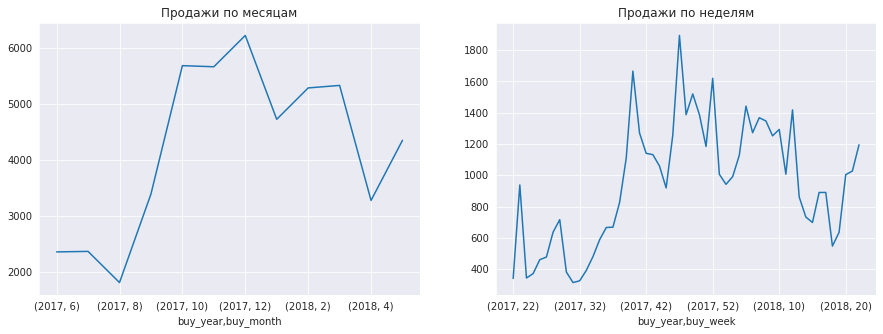

In [45]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
(orders_log.groupby(['buy_year','buy_month'])['revenue']
            .count()
            .plot(grid=True, ax=axes[0])
            .set_title('Продажи по месяцам')
)
(orders_log.groupby(['buy_year','buy_week'])['revenue']
            .count()
            .plot(grid=True, ax=axes[1])
            .set_title('Продажи по неделям')
            )

plt.show()

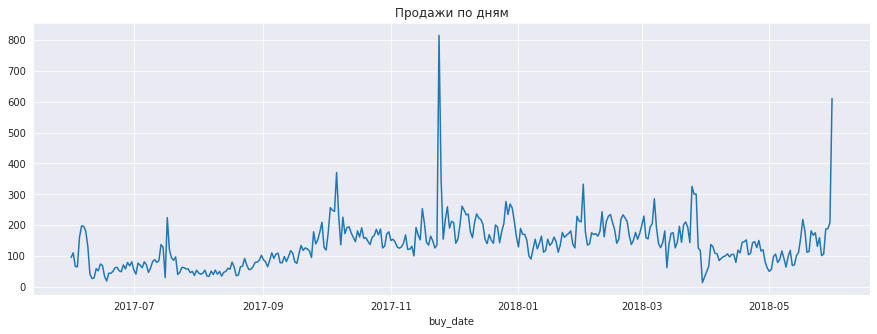

In [46]:
plt.figure(figsize=(15, 5))
(orders_log.groupby(['buy_date'])['revenue']
 .count()
 .plot(grid=True)
 .set_title('Продажи по дням')
 )
plt.show()

Граифики идентичны тем, что мы получали по посещениям - таким образом подтверждаем, что первая покупка совершается в момент первого визита. Дальше пользователи редко возвращаются - возможно это связано с какими либо юзабилити-неудобствами. Необходимо проводить исследование. Мы наблюдаем падение продаж в летнее время и рост продаж в новогодние праздники - зимой люди охотнее пользуются услугами компании

Посмотрим среднее число покупок на одного покупателя за 6 месяцев с помощью когортного анализа

In [47]:
orders_log.head()

,buy_ts,revenue,uid,first_buy,first_buy_date,buy_date,buy_week,buy_month,buy_year
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-06-01,22,6,2017
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,2017-06-01,22,6,2017
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,2017-06-01,22,6,2017
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01,2017-06-01,22,6,2017
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01,2017-06-01,22,6,2017


Вычислим `lifetime` наших когорт:

In [48]:
orders_log['buy_date'] = orders_log['buy_date'].astype('datetime64[M]')
orders_log['first_buy_date'] = orders_log['first_buy_date'].astype('datetime64[M]')

orders_log['lifetime'] = ((orders_log['buy_date'] - orders_log['first_buy_date']) 
                      / np.timedelta64(1,'M'))
orders_log['lifetime'] = orders_log['lifetime'].round().astype('int')
orders_log.head()

,buy_ts,revenue,uid,first_buy,first_buy_date,buy_date,buy_week,buy_month,buy_year,lifetime
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-06-01,22,6,2017,0
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,2017-06-01,22,6,2017,0
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,2017-06-01,22,6,2017,0
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01,2017-06-01,22,6,2017,0
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01,2017-06-01,22,6,2017,0


In [49]:
cohorts = (orders_log
           .groupby(['first_buy_date', 'lifetime'])
           .agg({'uid': ['count', 'nunique']})
           .reset_index()
          )
cohorts.columns = ['first_buy_date', 'lifetime', 'orders', 'uid']
cohorts.head()

,first_buy_date,lifetime,orders,uid
0,2017-06-01,0,2354,2023
1,2017-06-01,1,177,61
2,2017-06-01,2,174,50
3,2017-06-01,3,226,54
4,2017-06-01,4,292,88


Мы сформировали когорты, необходимо добавить пользователь в 'нулевую' когорту:

In [50]:
init_users = cohorts.query('lifetime == 0')[['first_buy_date', 'uid']]
init_users = init_users.rename(columns={'uid':'cohort_users'}) 
cohorts = pd.merge(cohorts, init_users, on='first_buy_date')
cohorts.head()

,first_buy_date,lifetime,orders,uid,cohort_users
0,2017-06-01,0,2354,2023,2023
1,2017-06-01,1,177,61,2023
2,2017-06-01,2,174,50,2023
3,2017-06-01,3,226,54,2023
4,2017-06-01,4,292,88,2023


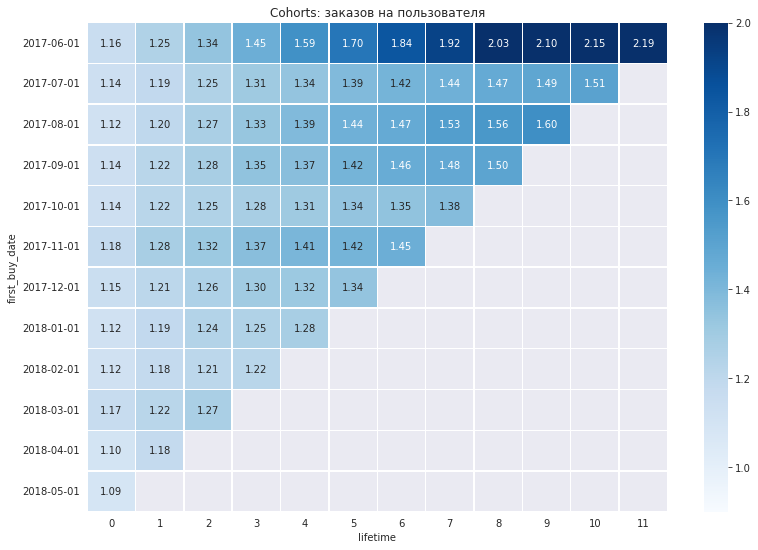

In [51]:
cohorts['order_per_user'] = cohorts['orders'] / cohorts['cohort_users']

report = cohorts.pivot_table(index='first_buy_date', 
                             columns='lifetime', 
                             values='order_per_user', 
                             aggfunc='sum')
report = report.cumsum(axis=1).round(2)
plt.figure(figsize=(13, 9))
plt.title('Cohorts: заказов на пользователя')
ax = sns.heatmap(report, annot=True, fmt='.2f', 
                 linewidths=.42, linecolor='white',
                 cmap='Blues', vmin=.9, vmax=2)
ax.set_yticklabels(retention_pivot.index.date)
plt.show()

In [53]:
mean_orders = round(report[5].mean(), 2)
print(f'В среднем пользователи делают {mean_orders} заказа')

В среднем пользователи делают 1.44 заказа


Посчитали среднее количество заказов на пользователей по когортам. Так или иначе - в среднем - их количество возрастает. За 6 месяцев в среднем покупатель делает примерно 1.5 заказа. 

In [55]:
buy_per_user = orders_log.groupby(['buy_date']).agg({'uid': ['count','nunique'], 'revenue':['sum']})
buy_per_user.columns = ['n_buys', 'n_users', 'revenue']
buy_per_user['buy_per_user'] = buy_per_user['revenue'] / buy_per_user['n_users']
mean_revenue_per_user = round(buy_per_user['buy_per_user'].mean(), 2)

In [56]:
print(f'Средний чек составляет {mean_revenue_per_user} у.е.')

Средний чек составляет 6.07 у.е.


<a href="#footer">К содержанию</a>
<footer id="footer"></footer>

---

#### LTV (lifetime value)

Перейдем к рассчету `LTV (lifetime value)` — «пожизненная» ценность клиента. Данные за год. Удобнее всего сформировать месячные когорты. 

Для удобства загрузим сет снова, чтобы избавится от лишних признаков.

In [57]:
ltv_orders = orders_log[['buy_ts', 'revenue', 'uid', 'buy_date']].copy()

Посчитаем количество новых покупателей (`n_buyers`) за каждый месяц:

In [58]:
first_orders = ltv_orders.groupby('uid').agg({'buy_date': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_buy_date']

cohort_sizes = (
    first_orders.groupby('first_buy_date')
    .agg({'uid': 'nunique'})
    .reset_index()
)
cohort_sizes.columns = ['first_buy_date', 'n_buyers']
cohort_sizes.head()

,first_buy_date,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340


Построим когорты. Добавим месяц первой покупки каждого покупателя в таблицу с заказами:

In [59]:
orders_new = pd.merge (ltv_orders, first_orders, on='uid')

Сгруппируем таблицу заказов по месяцу первой покупки и месяцу каждого заказа и сложим выручку. 

In [60]:
cohorts = (
    orders_new.groupby(['first_buy_date', 'buy_date'])
    .agg({'revenue': 'sum'})
    .reset_index()
)
cols = ['first_buy_date', 'buy_date']
for col in cols:
    cohorts[col] = cohorts[col].astype('datetime64[M]')

cohorts.head()

,first_buy_date,buy_date,revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58


С точки зрения когортного анализа LTV — накопительная выручка когорты в пересчёте на количество людей. Добавим в таблицу cohorts данные о том, сколько людей первый раз совершили покупку в каждый месяц:

In [61]:
report = pd.merge(cohort_sizes, cohorts, on='first_buy_date')
report.head()

,first_buy_date,n_buyers,buy_date,revenue
0,2017-06-01,2023,2017-06-01,9557.49
1,2017-06-01,2023,2017-07-01,981.82
2,2017-06-01,2023,2017-08-01,885.34
3,2017-06-01,2023,2017-09-01,1931.30
4,2017-06-01,2023,2017-10-01,2068.58


Добавим проверку - сумма `revenue` в заказа должна равняться в нашем отчете

In [62]:
assert np.allclose(report['revenue'].sum(), ltv_orders['revenue'].sum()), 'Проверить отчет'

`LTV` считают не из выручки, а из валовой прибыли. Необходимо найти валовую прибыль, умножив выручку на маржинальность. `LTV` — относительный показатель. Значит его удобнее смотреть по «возрастным» когортам, где в столбцах — не месяц заказа, а возраст (`age`) когорты.

In [63]:
margin_rate = 1.0


report['gp'] = report['revenue'] * margin_rate
report['age'] = (
    report['buy_date'] - report['first_buy_date']
) / np.timedelta64(1, 'M')

report['age'] = report['age'].round().astype('int')
report.head()

,first_buy_date,n_buyers,buy_date,revenue,gp,age
0,2017-06-01,2023,2017-06-01,9557.49,9557.49,0
1,2017-06-01,2023,2017-07-01,981.82,981.82,1
2,2017-06-01,2023,2017-08-01,885.34,885.34,2
3,2017-06-01,2023,2017-09-01,1931.30,1931.30,3
4,2017-06-01,2023,2017-10-01,2068.58,2068.58,4


Разделим валовую прибыль когорт за каждый месяц на общее число пользователей в каждой когорте. Для наглядности визуализируем когорты в виде тепловой карты:

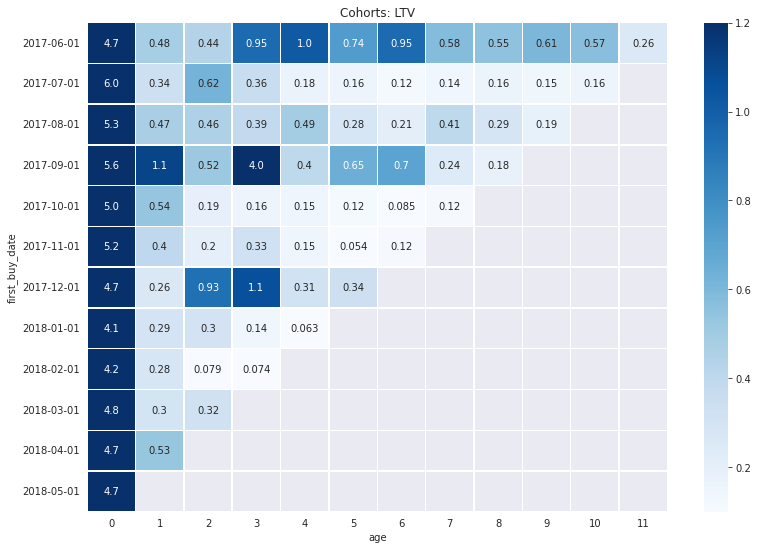

In [64]:
report['ltv'] = report['gp'] / report['n_buyers']

output = report.pivot_table(
    index='first_buy_date', columns='age', values='ltv', aggfunc='mean'
).round(3)

output.fillna('') 
plt.figure(figsize=(13, 9))
plt.title('Cohorts: LTV')
ax = sns.heatmap(output, annot=True, fmt='.2', 
                 linewidths=.42, linecolor='white',
                 cmap='Blues', vmin=0.1, vmax=1.2)
ax.set_yticklabels(output.index.date)
plt.show()

Посчитаем итоговый LTV первой когорты. Сложим их LTV по месяцам, также посчитаем средний LTV на первый месяц жизни когорты и за 6 месяцев

In [65]:
ltv_20170601 = output.loc['2017-06-01'].sum()
print(f'В среднем каждый покупатель из первой когорты принес {ltv_20170601} у.е валовой прибыли')
coh_mean = output.mean()[0].round(2)
print(f'В среднем каждый покупатель по когортам принес {coh_mean} у.е валовой прибыли на первый месяц')

ltvcumsum = output.cumsum(axis=1).mean(axis=0)[5].round(2)
print(f'Средний LTV по когортам за 6 месяцев {ltvcumsum} у.е')

В среднем каждый покупатель из первой когорты принес 11.88 у.е валовой прибыли
В среднем каждый покупатель по когортам принес 4.92 у.е валовой прибыли на первый месяц
Средний LTV по когортам за 6 месяцев 7.97 у.е


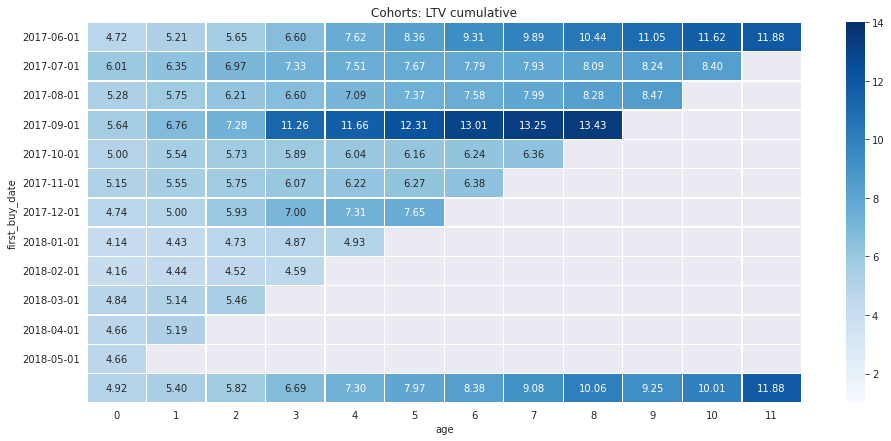

In [66]:
ltv_output = report.pivot_table(
    index='first_buy_date', columns='age', values='ltv'
).round(2)
ltv_output = ltv_output.cumsum(axis=1)
ltv_output.index = ltv_output.index.strftime("%m/%Y")
ltv_output.loc['mean'] = ltv_output.mean()

plt.figure(figsize=(16,7))
plt.title('Cohorts: LTV cumulative')
ax = sns.heatmap(ltv_output, annot=True, fmt='.2f', 
                 linewidths=.42, linecolor='white',
                 cmap='Blues', vmin=1, vmax=14)
ax.set_yticklabels(output.index.date)
plt.show()

Вывод  


В среднем каждый покупатель из первой когорты принес 11.88 у.е валовой прибыли  
В среднем каждый пользователь по когортам 4.8 у.е принес валовой прибыли на первый месяц  
Средний LTV по когортам за 6 месяцев 7.97 у.е

Можно выделить первую и четвертые когорты на общем фоне - вних самый выскоий LTV. Первая когорта расстет постепенно, без рывков, в четвертой  наблюдается резкий скачок в декабре 2017 года, возмоно это связано с предновогодними премьерами


<a href="#footer">К содержанию</a>
<footer id="footer"></footer>

---

### Маркетинговые метрики

#### Различие во времени маркетинговых метрик

Посчитаем и отобразим на графиках, как маркетинговые метрики различаются по рекламным источникам.

In [67]:
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [68]:
cost_sum = costs['costs'].sum()
print(f'Общая сумма расходов за весь период {cost_sum}')

Общая сумма расходов за весь период 329131.62


Посмотрим распределение расходов по источникам

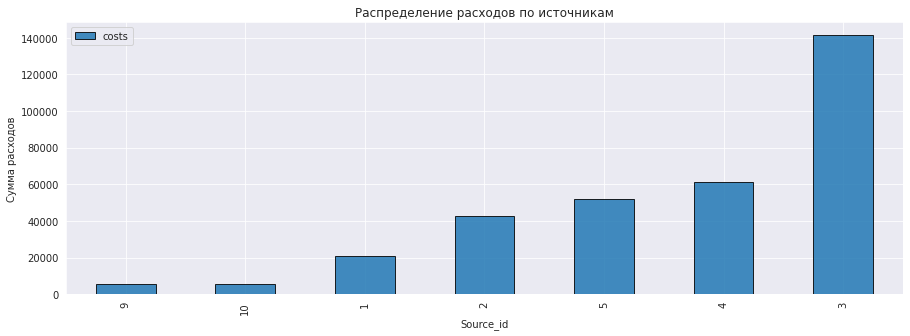

In [69]:
sourse_costs = (costs.groupby('source_id')
                     .agg({'costs': 'sum'})
                     .sort_values(by='costs')
                     )
sourse_costs.plot(kind='bar', figsize=(15,5), ec='black', alpha=.84)
plt.title('Распределение расходов по источникам')
plt.xlabel('Source_id')
plt.ylabel('Сумма расходов')
plt.show()

Больше всего расходов связано с 3-им источником. Один и тот же пользователь мог заходить на сайт из нескольких источников, поэтому важно определить «главный» источник для каждого и учитывать это в расчётах

Посмотрим на изменение расходов во времени в зависимости от источника

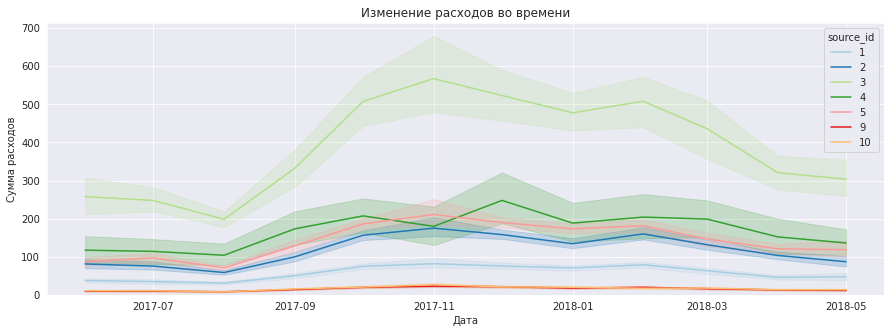

In [70]:
plt.figure(figsize=(15,5))
costs['month'] = costs['dt'].astype('datetime64[M]')
sns.lineplot(data=costs, 
             x='month', 
             y='costs', 
             hue='source_id', 
             legend='full', 
             palette='Paired'
             )
plt.title('Изменение расходов во времени')
plt.xlabel('Дата')
plt.ylabel('Сумма расходов')
plt.ylim(0)
plt.show()

Также построим `areachart` для наших метрик

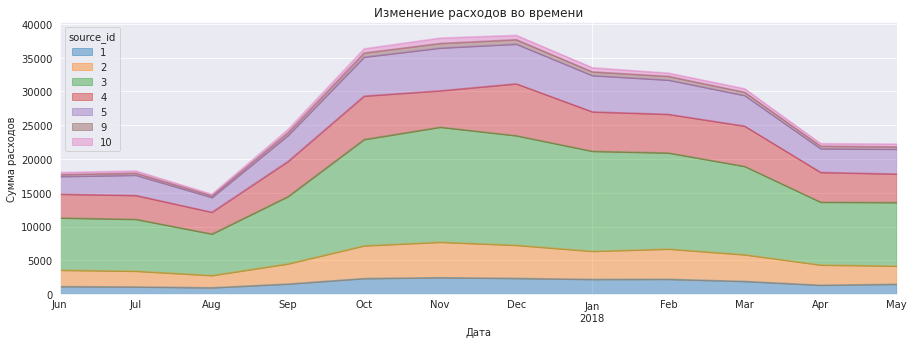

In [71]:
areachart = costs.pivot_table(index='month', 
                              columns='source_id', 
                              values='costs', 
                              aggfunc='sum'
                             )

ax = areachart.plot.area(stacked=True, figsize=(15,5), alpha=.42)
plt.title('Изменение расходов во времени')
plt.xlabel('Дата')
plt.ylabel('Сумма расходов')
plt.ylim(0)
plt.show()

Количество посетителей зависит от расходов на маркетинга - график по динамике напоминает `DAU`. Мы можем наблюдать рост расходов с ноября 2017, он является причиной выбросов на предыдущих графиках. Это сказалось соответственно и на среднем чеке

Самая активная динамика у третьего источника

Рассчитаем средний `CAC`— стоимость привлечения клиента, т.е. сумма денег, во сколько обходится новый клиент компании. на одного покупателя для всего проекта и для каждого источника трафика

<a href="#footer">К содержанию</a>
<footer id="footer"></footer>

---

#### Средний САС

Сгруппируем данные по месяцу и посчитаем сумму затрат.

In [72]:
costs['month'] = costs['dt'].astype('datetime64[M]')

month_costs = costs.groupby('month')['costs'].sum().reset_index()
month_costs

,month,costs
0,2017-06-01,18015.00
1,2017-07-01,18240.59
2,2017-08-01,14790.54
3,2017-09-01,24368.91
4,2017-10-01,36322.88
5,2017-11-01,37907.88
6,2017-12-01,38315.35
7,2018-01-01,33518.52
8,2018-02-01,32723.03
9,2018-03-01,30415.27


Добавим данные о расходах в отчёт и посчитаем `CAC`:

In [73]:
report_new = pd.merge(
    report, month_costs, left_on='first_buy_date', right_on='month'
)
report_new['cac'] = report_new['costs'] / report_new['n_buyers']
report_new.head() 

,first_buy_date,n_buyers,buy_date,revenue,gp,age,ltv,month,costs,cac
0,2017-06-01,2023,2017-06-01,9557.49,9557.49,0,4.724414,2017-06-01,18015.0,8.905091
1,2017-06-01,2023,2017-07-01,981.82,981.82,1,0.485329,2017-06-01,18015.0,8.905091
2,2017-06-01,2023,2017-08-01,885.34,885.34,2,0.437637,2017-06-01,18015.0,8.905091
3,2017-06-01,2023,2017-09-01,1931.30,1931.30,3,0.954671,2017-06-01,18015.0,8.905091
4,2017-06-01,2023,2017-10-01,2068.58,2068.58,4,1.022531,2017-06-01,18015.0,8.905091


In [74]:
mean_cac = round(report_new['cac'].mean(), 2)
print(f'Средний CAC на одного покупателя за весь период {mean_cac}')

Средний CAC на одного покупателя за весь период 9.32


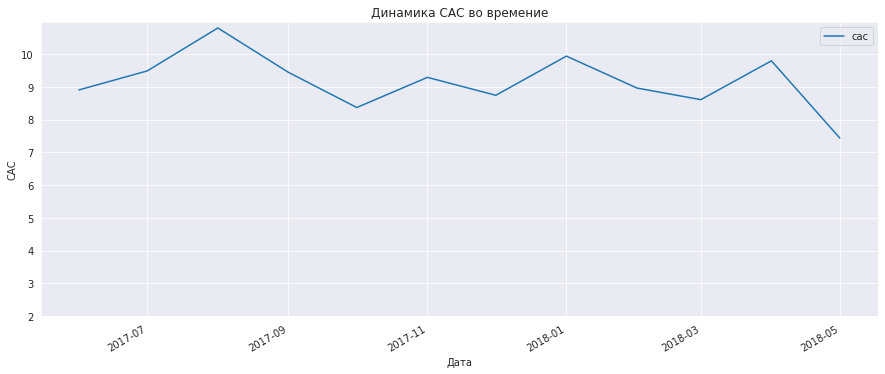

In [75]:
report_new.plot(x='month', y='cac', figsize=(15, 6), ylim=2)
plt.title('Динамика САС во времение')
plt.xlabel('Дата')
plt.ylabel('САС')
plt.show()

Среднее значение `CAC` за весь период составляет 9.32 уе, что превышет LTV (составляет примерно 8 уе)

<a href="#footer">К содержанию</a>
<footer id="footer"></footer>

---

#### САС для различных источников

Найдем для каждого пользователя его первый источник. Для этого обратимся к дата-сету посещений:

In [76]:
visits_log = visits_log.sort_values(by='start_ts')
init_source = visits_log.groupby('uid')['source_id'].first()
init_source.name = 'init_source'

init_source[:5]

uid
11863502262781     3
49537067089222     2
297729379853735    3
313578113262317    2
325320750514679    5
Name: init_source, dtype: int64

Для каждого покупателя к дате первого заказа закрепим первый источник, с которого был произведен заказ. 

In [77]:
cac_source = pd.merge(first_orders, init_source, on='uid')
cac_source.head()

,uid,first_buy_date,init_source
0,313578113262317,2018-01-01,2
1,1575281904278712,2017-06-01,10
2,2429014661409475,2017-10-01,3
3,2464366381792757,2018-01-01,5
4,2551852515556206,2017-11-01,5


Теперь необходимо посчитать уникальных пользователей

In [78]:
cac_source_total = (cac_source.groupby(['first_buy_date', 'init_source'])
                              .agg({'uid': 'nunique'})
                              .reset_index()
                              )

cac_source_total.rename(columns={'uid':'users_cnt'}, inplace=True)
cac_source_total.head()

,first_buy_date,init_source,users_cnt
0,2017-06-01,1,190
1,2017-06-01,2,235
2,2017-06-01,3,638
3,2017-06-01,4,413
4,2017-06-01,5,384


Теперь сгруппируем по источнику и месяцу затраты из сета costs

In [79]:
source_month_cost = costs.groupby(['month', 'source_id']).agg({'costs': 'sum'}).reset_index()
source_month_cost.head()

,month,source_id,costs
0,2017-06-01,1,1125.61
1,2017-06-01,2,2427.38
2,2017-06-01,3,7731.65
3,2017-06-01,4,3514.80
4,2017-06-01,5,2616.12


Получаем итоговый сет, содержащий информацию о стоимости, источнике и дате перой покупке

In [80]:
df = pd.merge(cac_source_total, source_month_cost,
              left_on=['first_buy_date', 'init_source'], 
              right_on=['month', 'source_id']
              )
df.drop('init_source', axis=1, inplace=True)
df.head()

,first_buy_date,users_cnt,month,source_id,costs
0,2017-06-01,190,2017-06-01,1,1125.61
1,2017-06-01,235,2017-06-01,2,2427.38
2,2017-06-01,638,2017-06-01,3,7731.65
3,2017-06-01,413,2017-06-01,4,3514.80
4,2017-06-01,384,2017-06-01,5,2616.12


In [81]:
df['cac'] = df['costs'] / df['users_cnt']
df.head()

,first_buy_date,users_cnt,month,source_id,costs,cac
0,2017-06-01,190,2017-06-01,1,1125.61,5.924263
1,2017-06-01,235,2017-06-01,2,2427.38,10.329277
2,2017-06-01,638,2017-06-01,3,7731.65,12.118574
3,2017-06-01,413,2017-06-01,4,3514.80,8.510412
4,2017-06-01,384,2017-06-01,5,2616.12,6.812813


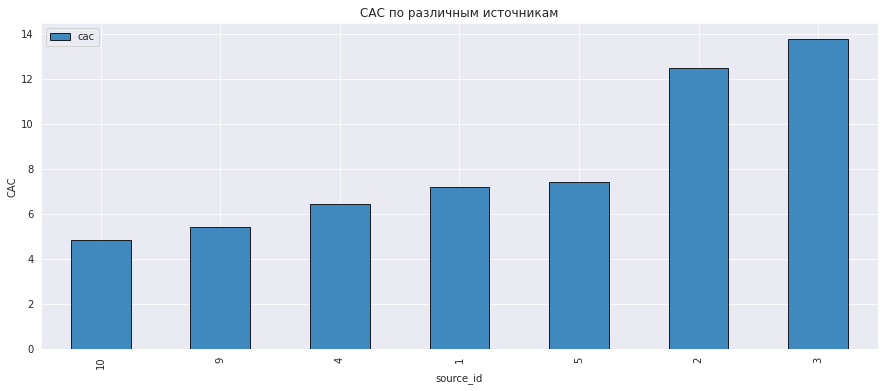

In [82]:
(df.groupby('source_id').agg({'cac': 'mean'})
                        .sort_values(by='cac')
                        .plot(kind='bar', figsize=(15,6), ec='black', alpha=.84)
)
plt.title('САС по различным источникам')
plt.xlabel('source_id')
plt.ylabel('САС')
plt.show()

По третьему источнику картинка не поменялась - по второму источнику наблюдаем больший САС. Лучшие по прибыли покупатели - привлечены через источник 3 и 2

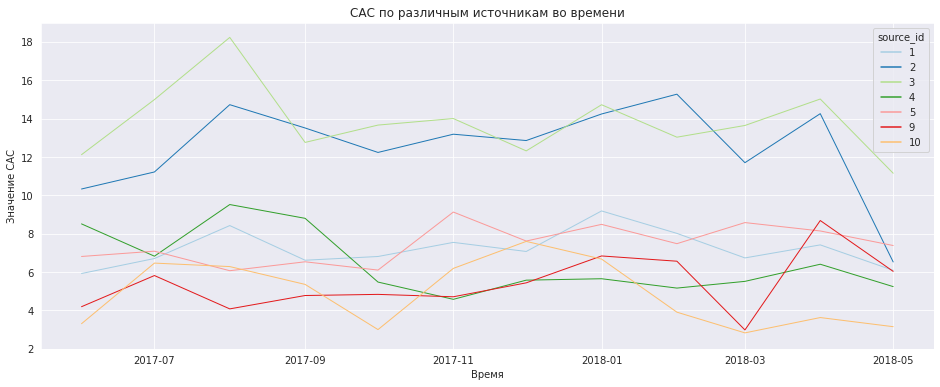

In [83]:
plt.figure(figsize=(16,6))
sns.lineplot(data=df, 
             x='month', 
             y='cac', 
             hue='source_id', 
             legend='full',
             palette='Paired',
             lw=1
             )
plt.title('САС по различным источникам во времени')
plt.xlabel('Время')
plt.ylabel('Значение САС')
plt.ylim(2)
plt.show()

Ярких тенденций и трендов не выявлено. 2 и 3 источники - имеют самый высокий показатель САС

#### ROMI по когортам в разрезе источников

In [84]:
orders_for_romi = pd.merge(orders_new, init_source, on='uid')

margin_rate = 1.0

orders_for_romi['age'] = (
    orders_for_romi['buy_date'] - orders_for_romi['first_buy_date']
) / np.timedelta64(1, 'M')

orders_for_romi['age'] = orders_for_romi['age'].round().astype('int')
orders_for_romi.head()

,buy_ts,revenue,uid,buy_date,first_buy_date,init_source,age
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,1,0
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2,0
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2,0
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,2,0
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,3,0


In [85]:
cohorts = (orders_for_romi
           .groupby(['first_buy_date', 'init_source', 'age'])
           .agg({'revenue': 'sum', 'uid': 'nunique'})
           .reset_index()
          )
cohorts.rename(columns={'uid': 'user_cnt'}, inplace=True)
cohorts.head()

,first_buy_date,init_source,age,revenue,user_cnt
0,2017-06-01,1,0,1378.70,190
1,2017-06-01,1,1,414.98,16
2,2017-06-01,1,2,419.43,10
3,2017-06-01,1,3,714.24,9
4,2017-06-01,1,4,811.20,12


Добавим к когортам стоимость затрат на в зависимости от источников

In [86]:
cohorts_new = pd.merge(cohorts, source_month_cost, 
                        left_on=['first_buy_date', 'init_source'], 
                        right_on=['month', 'source_id']
                        )
cohorts_new.drop('source_id', axis=1, inplace=True)
cohorts_new.head()

,first_buy_date,init_source,age,revenue,user_cnt,month,costs
0,2017-06-01,1,0,1378.70,190,2017-06-01,1125.61
1,2017-06-01,1,1,414.98,16,2017-06-01,1125.61
2,2017-06-01,1,2,419.43,10,2017-06-01,1125.61
3,2017-06-01,1,3,714.24,9,2017-06-01,1125.61
4,2017-06-01,1,4,811.20,12,2017-06-01,1125.61


In [87]:
users_cnt = cohorts_new.query('age == 0')[['first_buy_date', 'init_source', 'user_cnt']]
users_cnt = users_cnt.rename(columns={'user_cnt':'cohort_users'})

cohorts_final = pd.merge(cohorts_new, users_cnt, on=['first_buy_date', 'init_source'])

Получили финальный сет - теперь можем рассчитать показатель ROMI в зависимости от источника

In [88]:
cohorts_final.head()

,first_buy_date,init_source,age,revenue,user_cnt,month,costs,cohort_users
0,2017-06-01,1,0,1378.70,190,2017-06-01,1125.61,190
1,2017-06-01,1,1,414.98,16,2017-06-01,1125.61,190
2,2017-06-01,1,2,419.43,10,2017-06-01,1125.61,190
3,2017-06-01,1,3,714.24,9,2017-06-01,1125.61,190
4,2017-06-01,1,4,811.20,12,2017-06-01,1125.61,190


In [89]:
cohorts_final = (cohorts_final.assign(
    
              gp = lambda x: x['revenue'] * margin_rate,
              ltv = lambda x: x['gp'] / x['cohort_users'],
              cac = lambda x: x['costs'] / x['cohort_users'],
              romi = lambda x: x['ltv'] / x['cac']
              )
)

cohorts_final.head()

,first_buy_date,init_source,age,revenue,user_cnt,month,costs,cohort_users,gp,ltv,cac,romi
0,2017-06-01,1,0,1378.70,190,2017-06-01,1125.61,190,1378.70,7.256316,5.924263,1.224847
1,2017-06-01,1,1,414.98,16,2017-06-01,1125.61,190,414.98,2.184105,5.924263,0.368671
2,2017-06-01,1,2,419.43,10,2017-06-01,1125.61,190,419.43,2.207526,5.924263,0.372625
3,2017-06-01,1,3,714.24,9,2017-06-01,1125.61,190,714.24,3.759158,5.924263,0.634536
4,2017-06-01,1,4,811.20,12,2017-06-01,1125.61,190,811.20,4.269474,5.924263,0.720676


In [90]:
sources = list(cohorts_final['init_source'].unique())

for source in sources:
    df = cohorts_final[cohorts_final['init_source'] == source]
    df_pivot = df.pivot_table(index='first_buy_date', 
                                      columns='age', 
                                      values='romi').cumsum(axis=1).round(2)
    print('Средний показатель ROMI за 6 месяцев. Источник ' + str(source), 'составляет ', round(df_pivot[5].mean(), 2))

Средний показатель ROMI за 6 месяцев. Источник 1 составляет  1.77
Средний показатель ROMI за 6 месяцев. Источник 2 составляет  1.23
Средний показатель ROMI за 6 месяцев. Источник 3 составляет  0.41
Средний показатель ROMI за 6 месяцев. Источник 4 составляет  0.9
Средний показатель ROMI за 6 месяцев. Источник 5 составляет  1.39
Средний показатель ROMI за 6 месяцев. Источник 9 составляет  1.22
Средний показатель ROMI за 6 месяцев. Источник 10 составляет  0.75


Построим тепловые карты для самых затратных источников

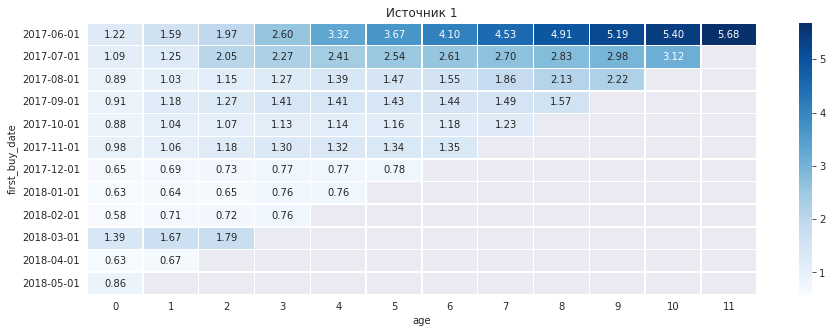

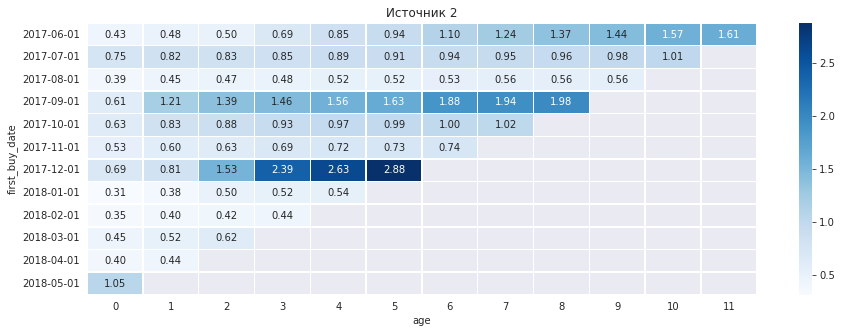

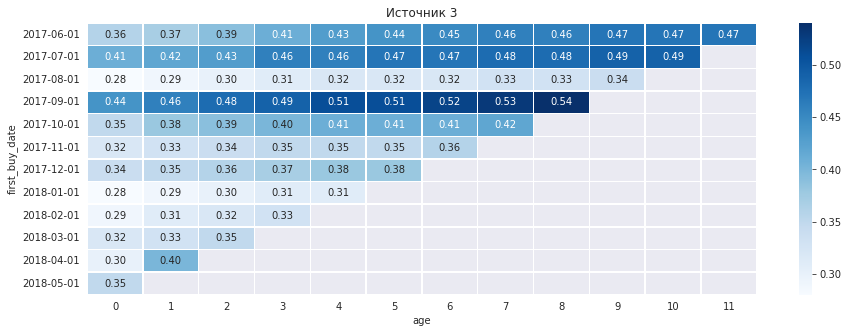

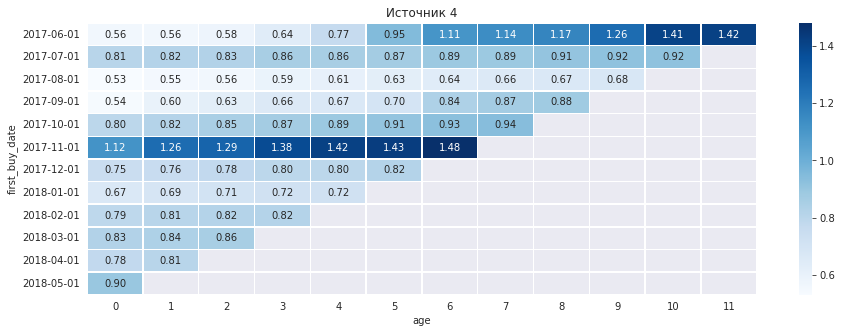

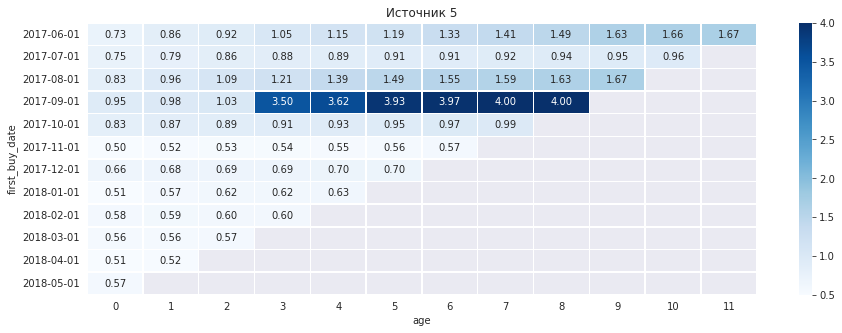

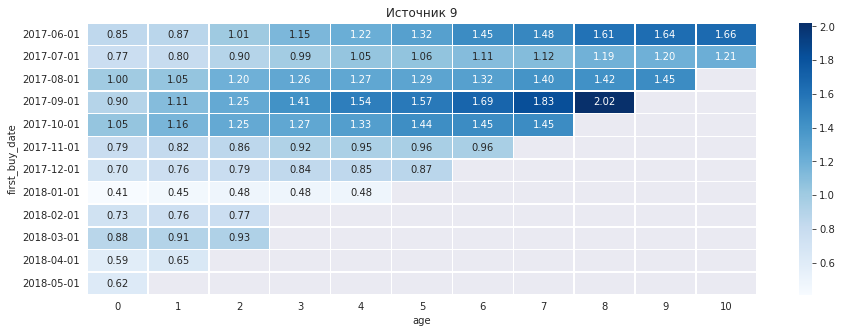

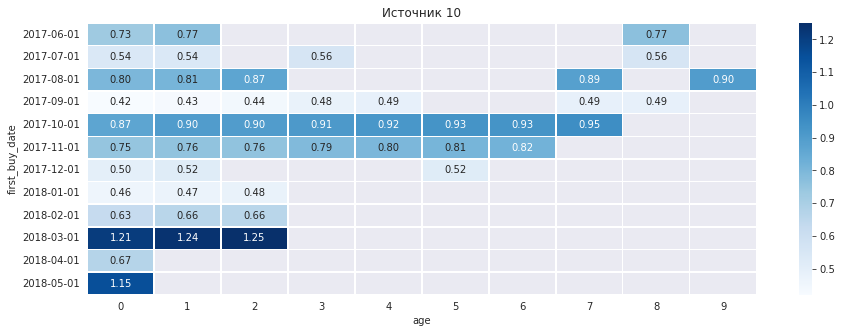

In [91]:
for source in sources:
    df = cohorts_final[cohorts_final['init_source'] == source]
    df_pivot = df.pivot_table(index='first_buy_date', 
                                      columns='age', 
                                      values='romi').cumsum(axis=1).round(2)
    
    plt.figure(figsize=(15,5))
    plt.title('Источник ' + str(source))
    ax = sns.heatmap(df_pivot, annot=True, fmt='.2f', 
                 linewidths=.42, linecolor='white',
                 cmap='Blues')
    ax.set_yticklabels(df_pivot.index.date)
    plt.show()

Вывод  


Лучшие источник - 1, 2, 5 и 9 - окупается меньше, чем за полгода. У второго источника - самый высокий `CAC` из упомянутых выше. 3 источник имеет самый выскойи `САС` среди источников пользователя - но при этом у него низкая окупаемость - это самый проблемный источник - который ннеобходимо дополнительно изучать. 

<a href="#footer">К содержанию</a>
<footer id="footer"></footer>

---

## Выводы и рекомендации

Среднее `DAU` составляет  -  907 уникальных пользователей в день;  
Среднее `WAU` составляет  -  5716 уникальных пользователей в неделю;  
Среднее `MAU` составляет  -  23228 уникальных пользователей в месяц  

Довольно приличное количество уникальных пользователей в месяц, но стоит отметить спады с 6 по 8 месяц - летние дни - возможно связано с периодом отпусков, погодными условями - люди предпочитают проводить время на улице. Необходимо следить за показателями "Липкого фактора" - сейчас что то конкретное сказать затруднительно - есть рост или нет. Вовлеченность некоторая наблюдается.   

 
Среднее время сессии ASL составляет: `643.51 секунд`. 

Чаще всего пользователи сидят на сайте не продолжительное время. Возможно, наш сайт плохо отображается в мобильной версии — и все сессии со смартфонов и планшетов очень короткие. Так или иначе - сделать вывод о том, много это или мало - нам необходимо посмотреть дополнительные метрики. 

`Retention Rate` в следующий месяц значительно убывает по когортам с течением времени - резкое падение на второй месяц - дальше уже наблюдаем более менее стабильное поведение. Чаще всего пользователи проводят на сервисе минуту - необходимо увеличивать удержание и разбираться в причинах.  


Первая покупка совершается в момент первого визита. Дальше пользователи редко возвращаются - возможно это связано с какими либо юзабилити-неудобствами. Необходимо проводить исследование. Мы наблюдаем падение продаж в летнее время и рост продаж в новогодние праздники - зимой люди охотнее пользуются услугами компании  


Можно выделить `первую` и `четвертые` когорты на общем фоне - вних самый выскоий `LTV`. Первая когорта расстет постепенно, без рывков, в четвертой наблюдается резкий скачок в `декабре 2017 года`, возмоно это связано с предновогодними премьерами  


Больше всего расходов связано с `3-им источником`. Количество посетителей зависит от расходов на маркетинга - график по динамике напоминает `DAU`. Мы можем наблюдать рост расходов с ноября 2017, он является причиной выбросов на предыдущих графиках. Это сказалось соответственно и на среднем чеке

Самая активная динамика у третьего источника

Лучшие источник - `1, 2, 5 и 9` - окупается меньше, чем за полгода. У второго источника - самый высокий CAC из упомянутых выше. `3` источник имеет самый выскойи `САС` среди источников пользователя - но при этом у него низкая окупаемость - это самый проблемный источник - который необходимо дополнительно изучать


**Таким образом:**  

- Необходимо рассмотреть возможность отказа от использования третьего источника
- Самыми ценными пользователи - первой когорты
- Также прибыльные когорты: вторая, третья, четвертая, седьмая - на них стоит обратить внимание



<a href="#footer">К содержанию</a>
<footer id="footer"></footer>

---